In [3]:
pip install alpha_vantage

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import numpy as np


In [5]:
API_key='LCGAAANH9ATJWBC2'
ts = TimeSeries(key=API_key, output_format='pandas')


In [6]:
class ScriptData:
    def __init__(self, script):
        self.script = script
    
   # @classmethod
    def fetch_intraday_data(self):
        data=ts.get_intraday(self.script)
        return data[0]
    def convert_intraday_data(self):
        df=pd.DataFrame(self.fetch_intraday_data())    
        return df


In [7]:
script_data=ScriptData('GOOGL')
script_data.fetch_intraday_data()
script_data.convert_intraday_data()
data=ts.get_intraday('GOOGL')
data

(                     1. open  2. high  3. low  4. close  5. volume
 date                                                              
 2023-01-03 20:00:00   89.310  89.3100   89.06   89.0700     8823.0
 2023-01-03 19:45:00   89.390  89.4000   89.31   89.3300     3353.0
 2023-01-03 19:30:00   89.300  89.3800   89.30   89.3800     1889.0
 2023-01-03 19:15:00   89.260  89.3700   89.26   89.3600     2858.0
 2023-01-03 19:00:00   89.260  89.2600   89.26   89.2600      782.0
 ...                      ...      ...     ...       ...        ...
 2022-12-30 12:15:00   87.380  87.3940   87.18   87.3001   333114.0
 2022-12-30 12:00:00   87.360  87.4500   87.21   87.3815   484196.0
 2022-12-30 11:45:00   87.350  87.5138   87.33   87.3550   476826.0
 2022-12-30 11:30:00   87.260  87.3900   87.15   87.3500   535506.0
 2022-12-30 11:15:00   87.235  87.5795   87.21   87.2500   766819.0
 
 [100 rows x 5 columns],
 {'1. Information': 'Intraday (15min) open, high, low, close prices and volume',
  '2. Sy

In [8]:
try:
    ts.get_intraday('NVDA')
    print('True')
except ValueError:
    print('False')

True


In [9]:
try:
    ts.get_intraday('GOOGL')
    print('True')
except ValueError:
    print('False')

True


In [10]:
df=data[0]
df

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-01-03 20:00:00,89.310,89.3100,89.06,89.0700,8823.0
2023-01-03 19:45:00,89.390,89.4000,89.31,89.3300,3353.0
2023-01-03 19:30:00,89.300,89.3800,89.30,89.3800,1889.0
2023-01-03 19:15:00,89.260,89.3700,89.26,89.3600,2858.0
2023-01-03 19:00:00,89.260,89.2600,89.26,89.2600,782.0
...,...,...,...,...,...
2022-12-30 12:15:00,87.380,87.3940,87.18,87.3001,333114.0
2022-12-30 12:00:00,87.360,87.4500,87.21,87.3815,484196.0
2022-12-30 11:45:00,87.350,87.5138,87.33,87.3550,476826.0


In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df.columns = df.columns.str.replace(' ', '')
df.loc[:,"4.close"]

date
2023-01-03 20:00:00    89.0700
2023-01-03 19:45:00    89.3300
2023-01-03 19:30:00    89.3800
2023-01-03 19:15:00    89.3600
2023-01-03 19:00:00    89.2600
                        ...   
2022-12-30 12:15:00    87.3001
2022-12-30 12:00:00    87.3815
2022-12-30 11:45:00    87.3550
2022-12-30 11:30:00    87.3500
2022-12-30 11:15:00    87.2500
Name: 4.close, Length: 100, dtype: float64

In [13]:
df['pandas_SMA_3'] = df.iloc[:,1].rolling(window=5).mean()

In [14]:
df.loc[:,"pandas_SMA_3"]

date
2023-01-03 20:00:00         NaN
2023-01-03 19:45:00         NaN
2023-01-03 19:30:00         NaN
2023-01-03 19:15:00         NaN
2023-01-03 19:00:00    89.34400
                         ...   
2022-12-30 12:15:00    87.47382
2022-12-30 12:00:00    87.46982
2022-12-30 11:45:00    87.47458
2022-12-30 11:30:00    87.44956
2022-12-30 11:15:00    87.46546
Name: pandas_SMA_3, Length: 100, dtype: float64

In [15]:
def indicator1(f,timeperiod):
    p=ts.get_intraday(f)
    df=p[0]
    df['pandas_SMA'] = df.iloc[:,1].rolling(window=timeperiod).mean()
    return df.loc[:,"pandas_SMA"]

In [16]:
indicator1('GOOGL',5)

date
2023-01-03 20:00:00         NaN
2023-01-03 19:45:00         NaN
2023-01-03 19:30:00         NaN
2023-01-03 19:15:00         NaN
2023-01-03 19:00:00    89.34400
                         ...   
2022-12-30 12:15:00    87.47382
2022-12-30 12:00:00    87.46982
2022-12-30 11:45:00    87.47458
2022-12-30 11:30:00    87.44956
2022-12-30 11:15:00    87.46546
Name: pandas_SMA, Length: 100, dtype: float64

In [17]:
indicator1('AAPL',5)

date
2023-01-03 20:00:00          NaN
2023-01-03 19:45:00          NaN
2023-01-03 19:30:00          NaN
2023-01-03 19:15:00          NaN
2023-01-03 19:00:00    125.05202
                         ...    
2022-12-30 12:15:00    129.02100
2022-12-30 12:00:00    129.03800
2022-12-30 11:45:00    128.97900
2022-12-30 11:30:00    128.89000
2022-12-30 11:15:00    128.87400
Name: pandas_SMA, Length: 100, dtype: float64

In [18]:
class Strategy:
    def __init__(self, script, timeperiod):
        self.script = script
        self.timeperiod = timeperiod
    def get_signal(self):
        data=ts.get_intraday(self.script)
        d1=data[0]
        d2=pd.DataFrame(list(zip(d1.loc[:,"4. close"], indicator1(self.script,self.timeperiod))), columns =['close_data', 'indicator_data'])
        d3 = pd.DataFrame()
        f=list()
        if((d2.loc[0, "indicator_data"]>d2.loc[0, "close_data"])):
                f.append("BUY")
        elif((d2.loc[0, "indicator_data"]<d2.loc[0, "close_data"])):
                f.append("SELL")
        else:
            f.append("NO_SIGNAL")
        for i in range(1,len(d2),1):
            if((d2.loc[i-1, "close_data"]>d2.loc[i-1, "indicator_data"])and(d2.loc[i, "close_data"]<d2.loc[i, "indicator_data"])):
                f.append("BUY")
            elif((d2.loc[i-1, "indicator_data"]>d2.loc[i-1, "close_data"])and(d2.loc[i, "indicator_data"]<d2.loc[i, "close_data"])):
                f.append("SELL")
            else:
                f.append("NO_SIGNAL")
     
        d1.insert(0,'signals',f)
        newdf=d1.loc[(d1['signals']=="BUY")|(d1['signals']=="SELL")]
        #newdf = d1.loc[d1['signals'] != "No signal"]
        
        return newdf['signals']
                

In [21]:
p=Strategy('NVDA',5)
q=p.get_signal()
q

date
2023-01-03 17:45:00    SELL
2023-01-03 17:30:00     BUY
2023-01-03 17:15:00    SELL
2023-01-03 16:45:00     BUY
2023-01-03 11:00:00    SELL
2023-01-03 10:45:00     BUY
2023-01-03 10:30:00    SELL
2023-01-03 10:15:00     BUY
2023-01-03 10:00:00    SELL
2023-01-03 09:00:00     BUY
2023-01-03 06:30:00    SELL
2023-01-03 05:45:00     BUY
2023-01-03 05:00:00    SELL
2023-01-03 04:45:00     BUY
2022-12-30 16:30:00    SELL
2022-12-30 16:15:00     BUY
2022-12-30 13:15:00    SELL
2022-12-30 12:30:00     BUY
Name: signals, dtype: object

In [26]:
df.rename(columns={"1.open": "Open", "2.high":"High", "3.low":"Low", "4.close": "Close"}, inplace=True)
df.head()

,Open,High,Low,Close,5.volume,pandas_SMA_3
date,,,,,,
2023-01-03 20:00:00,89.31,89.31,89.06,89.07,8823.0,NaN
2023-01-03 19:45:00,89.39,89.40,89.31,89.33,3353.0,NaN
2023-01-03 19:30:00,89.30,89.38,89.30,89.38,1889.0,NaN
2023-01-03 19:15:00,89.26,89.37,89.26,89.36,2858.0,NaN
2023-01-03 19:00:00,89.26,89.26,89.26,89.26,782.0,89.344


In [23]:
pip install --upgrade mplfinance

Note: you may need to restart the kernel to use updated packages.


In [24]:
from matplotlib.pyplot import title
import requests
import pandas as pd
import mplfinance as mpl

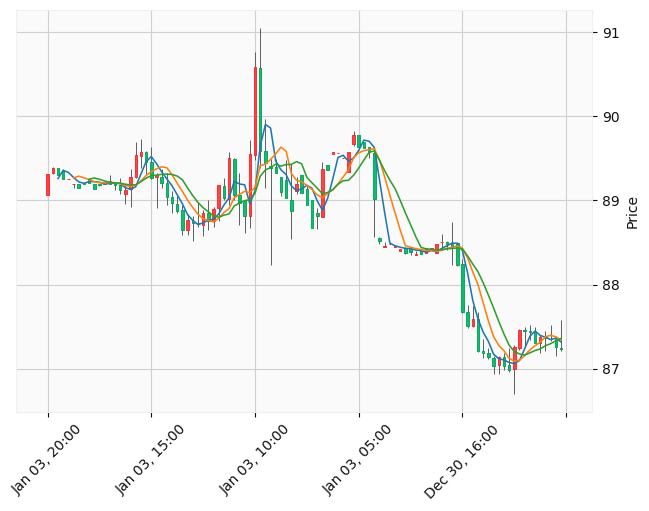

In [27]:
mpl.plot(
    df,
    type="candle", 
    mav =(3,6,9),  
    style="yahoo"
    )